## Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets
import idx2numpy

## Functions

In [8]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    " Return the sigmoid function "
    y = 1/(1 + np.exp(-z))
    return y

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot((1 - labels), np.log(1 - predictions))

    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = - (cost/observations)

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = len(features.columns)# number of features

    #1 - Get Predictions
    predictions = predict(features, weights)
    

    gradient = np.dot((predictions - labels) , features)# Write down the gradient of the cost

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - lr * gradient# Write down the update rule here

    return weights

def decision_boundary(prob):
    if prob >= .3 :
        return 1 
    elif prob >= .6 :
        return -1
    else :
        return 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

## Data

In [42]:
data = sklearn.datasets.make_classification(n_samples=1000, n_classes=10,n_clusters_per_class=1, n_features= 10,n_informative=10, n_redundant=0, n_repeated=0)

In [43]:
X = pd.DataFrame(data[0])# Features
y = data[1]# Target labels

In [44]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
train_data = []
for i in np.unique(y_train) :
    l1 = np.zeros(len(y_train))
    l1[np.where(y_train == i)] = 1
    train_data.append(l1)


In [46]:
test_data = []
for i in np.unique(y_test) :
    l1 = np.zeros(len(y_test))
    l1[np.where(y_test == i)] = 1
    test_data.append(l1)

In [14]:
weights = []
losses = []
for i in train_data :
    # Initialize the weights
    wts = np.random.normal(0, 1, len(x_train.columns))
    # Training
    optimal_wts, loss = train(x_train, i, wts, 1e-5, 1000)
    weights.append(optimal_wts)
    losses.append(loss)
    

iter: 0 cost: 2.6154563236332184
iter: 1 cost: 2.6148269579830234
iter: 2 cost: 2.614197704657765
iter: 3 cost: 2.6135685825718156
iter: 4 cost: 2.612939591737507
iter: 5 cost: 2.6123107129813685
iter: 6 cost: 2.611681965157764
iter: 7 cost: 2.6110533310484594
iter: 8 cost: 2.6104248286108707
iter: 9 cost: 2.60979643935888
iter: 10 cost: 2.6091681815283954
iter: 11 cost: 2.608540037662184
iter: 12 cost: 2.6079120251323893
iter: 13 cost: 2.6072841443713433
iter: 14 cost: 2.6066563613967286
iter: 15 cost: 2.606028727070896
iter: 16 cost: 2.605401206661033
iter: 17 cost: 2.6047738022718816
iter: 18 cost: 2.604146528600271
iter: 19 cost: 2.6035193713824882
iter: 20 cost: 2.6028923460607256
iter: 21 cost: 2.6022654359201858
iter: 22 cost: 2.6016386411988752
iter: 23 cost: 2.601011978935685
iter: 24 cost: 2.6003854498343957
iter: 25 cost: 2.599759036109294
iter: 26 cost: 2.599132738560039
iter: 27 cost: 2.5985065583697637
iter: 28 cost: 2.59788050981099
iter: 29 cost: 2.597254595253966
iter:

iter: 805 cost: 2.1490318050156887
iter: 806 cost: 2.1485033175014228
iter: 807 cost: 2.147974958202437
iter: 808 cost: 2.1474467277460287
iter: 809 cost: 2.146918625765916
iter: 810 cost: 2.1463906523014185
iter: 811 cost: 2.1458628075015116
iter: 812 cost: 2.1453350914339238
iter: 813 cost: 2.144807503251415
iter: 814 cost: 2.144280044050839
iter: 815 cost: 2.1437527134689187
iter: 816 cost: 2.143225511550775
iter: 817 cost: 2.142698437921881
iter: 818 cost: 2.142171493192138
iter: 819 cost: 2.14164467655531
iter: 820 cost: 2.1411179889839143
iter: 821 cost: 2.140591429715005
iter: 822 cost: 2.140064999216624
iter: 823 cost: 2.1395386972253174
iter: 824 cost: 2.1390125238237143
iter: 825 cost: 2.1384864791280487
iter: 826 cost: 2.1379605631868084
iter: 827 cost: 2.1374347756500556
iter: 828 cost: 2.136909116698732
iter: 829 cost: 2.1363835867825376
iter: 830 cost: 2.1358581852209135
iter: 831 cost: 2.1353329120503246
iter: 832 cost: 2.134807767788088
iter: 833 cost: 2.134282752606139

iter: 686 cost: 2.1878949097923646
iter: 687 cost: 2.187405294805393
iter: 688 cost: 2.1869157723349657
iter: 689 cost: 2.186426342371591
iter: 690 cost: 2.1859370049162608
iter: 691 cost: 2.1854477599493656
iter: 692 cost: 2.184958607473646
iter: 693 cost: 2.184469547475972
iter: 694 cost: 2.183980579948444
iter: 695 cost: 2.1834917048836164
iter: 696 cost: 2.1830029222693255
iter: 697 cost: 2.182514232099373
iter: 698 cost: 2.1820256343690834
iter: 699 cost: 2.1815371290587264
iter: 700 cost: 2.181048716174059
iter: 701 cost: 2.180560395699232
iter: 702 cost: 2.180072167626969
iter: 703 cost: 2.1795840319525377
iter: 704 cost: 2.1790959886615897
iter: 705 cost: 2.178608037752482
iter: 706 cost: 2.1781201792058713
iter: 707 cost: 2.177632413019663
iter: 708 cost: 2.1771447391961667
iter: 709 cost: 2.1766571577095233
iter: 710 cost: 2.17616966855992
iter: 711 cost: 2.175682271747935
iter: 712 cost: 2.1751949672433675
iter: 713 cost: 2.174707755055677
iter: 714 cost: 2.174220635168359
i

iter: 467 cost: 2.358468312828183
iter: 468 cost: 2.35800548894975
iter: 469 cost: 2.357542728696429
iter: 470 cost: 2.357080032039304
iter: 471 cost: 2.356617399014657
iter: 472 cost: 2.3561548296152752
iter: 473 cost: 2.355692323828121
iter: 474 cost: 2.355229881681934
iter: 475 cost: 2.354767503169453
iter: 476 cost: 2.354305188270779
iter: 477 cost: 2.353842937028744
iter: 478 cost: 2.3533807494284322
iter: 479 cost: 2.3529186254585728
iter: 480 cost: 2.352456565142144
iter: 481 cost: 2.351994568466343
iter: 482 cost: 2.351532635442943
iter: 483 cost: 2.351070766072859
iter: 484 cost: 2.350608960367108
iter: 485 cost: 2.3501472183185506
iter: 486 cost: 2.3496855399298715
iter: 487 cost: 2.349223925205106
iter: 488 cost: 2.348762374149434
iter: 489 cost: 2.3483008867686284
iter: 490 cost: 2.3478394630528623
iter: 491 cost: 2.347378103024445
iter: 492 cost: 2.3469168066720845
iter: 493 cost: 2.3464555739907054
iter: 494 cost: 2.3459944050071475
iter: 495 cost: 2.3455332997060894
iter

iter: 339 cost: 3.1455343261260316
iter: 340 cost: 3.144636242051453
iter: 341 cost: 3.143738279501109
iter: 342 cost: 3.14284043967258
iter: 343 cost: 3.1419427213567817
iter: 344 cost: 3.1410451256048773
iter: 345 cost: 3.14014765195634
iter: 346 cost: 3.139250300711927
iter: 347 cost: 3.1383530716916535
iter: 348 cost: 3.137455965426867
iter: 349 cost: 3.1365589813773833
iter: 350 cost: 3.135662119466698
iter: 351 cost: 3.134765380142997
iter: 352 cost: 3.133868763685259
iter: 353 cost: 3.132972269678822
iter: 354 cost: 3.1320758985685933
iter: 355 cost: 3.1311796498177364
iter: 356 cost: 3.1302835237424294
iter: 357 cost: 3.1293875207391397
iter: 358 cost: 3.128491640337144
iter: 359 cost: 3.127595882477325
iter: 360 cost: 3.1267002477034676
iter: 361 cost: 3.1258047358699166
iter: 362 cost: 3.1249093472728013
iter: 363 cost: 3.124014081541651
iter: 364 cost: 3.1231189389894523
iter: 365 cost: 3.1222239193790835
iter: 366 cost: 3.121329022786084
iter: 367 cost: 3.1204342492136004
i

iter: 188 cost: 1.7224333669313945
iter: 189 cost: 1.7217223940367439
iter: 190 cost: 1.7210116416623982
iter: 191 cost: 1.7203011098463565
iter: 192 cost: 1.71959079862786
iter: 193 cost: 1.7188807080470274
iter: 194 cost: 1.7181708381234322
iter: 195 cost: 1.7174611888991869
iter: 196 cost: 1.7167517604048554
iter: 197 cost: 1.7160425526844307
iter: 198 cost: 1.7153335657660846
iter: 199 cost: 1.7146247996792467
iter: 200 cost: 1.7139162544709565
iter: 201 cost: 1.7132079301723673
iter: 202 cost: 1.712499826816098
iter: 203 cost: 1.7117919444355452
iter: 204 cost: 1.711084283069226
iter: 205 cost: 1.7103768427525587
iter: 206 cost: 1.7096696235101971
iter: 207 cost: 1.708962625387565
iter: 208 cost: 1.7082558484152974
iter: 209 cost: 1.7075492926248703
iter: 210 cost: 1.706842958057004
iter: 211 cost: 1.7061368447452236
iter: 212 cost: 1.7054309527281146
iter: 213 cost: 1.7047252820258831
iter: 214 cost: 1.704019832686914
iter: 215 cost: 1.7033146047411645
iter: 216 cost: 1.702609598

iter: 933 cost: 1.2563108982343927
iter: 934 cost: 1.2557743243177506
iter: 935 cost: 1.2552379994502905
iter: 936 cost: 1.2547019236708774
iter: 937 cost: 1.2541660970180957
iter: 938 cost: 1.2536305195308985
iter: 939 cost: 1.2530951912479011
iter: 940 cost: 1.2525601122078056
iter: 941 cost: 1.2520252824491638
iter: 942 cost: 1.2514907020105241
iter: 943 cost: 1.2509563709301694
iter: 944 cost: 1.2504222892467503
iter: 945 cost: 1.2498884569984774
iter: 946 cost: 1.2493548742236016
iter: 947 cost: 1.2488215409603594
iter: 948 cost: 1.2482884572469697
iter: 949 cost: 1.2477556231214202
iter: 950 cost: 1.2472230386216598
iter: 951 cost: 1.2466907037858435
iter: 952 cost: 1.2461586186518943
iter: 953 cost: 1.2456267832574084
iter: 954 cost: 1.245095197640476
iter: 955 cost: 1.2445638618384747
iter: 956 cost: 1.2440327758892644
iter: 957 cost: 1.243501939830477
iter: 958 cost: 1.2429713536994498
iter: 959 cost: 1.2424410175337548
iter: 960 cost: 1.2419109313706265
iter: 961 cost: 1.2413

iter: 781 cost: 1.9844640937350255
iter: 782 cost: 1.9841031372856606
iter: 783 cost: 1.9837422462412149
iter: 784 cost: 1.9833814203940967
iter: 785 cost: 1.9830206597648725
iter: 786 cost: 1.9826599643546792
iter: 787 cost: 1.9822993341617634
iter: 788 cost: 1.9819387692089367
iter: 789 cost: 1.9815782692845945
iter: 790 cost: 1.9812178348214005
iter: 791 cost: 1.9808574653869804
iter: 792 cost: 1.9804971612331814
iter: 793 cost: 1.980136922121258
iter: 794 cost: 1.979776748291019
iter: 795 cost: 1.9794166395232795
iter: 796 cost: 1.9790565958394188
iter: 797 cost: 1.9786966174592164
iter: 798 cost: 1.9783367039557793
iter: 799 cost: 1.9779768557560253
iter: 800 cost: 1.977617072673614
iter: 801 cost: 1.9772573544929992
iter: 802 cost: 1.9768977014317712
iter: 803 cost: 1.9765381137260318
iter: 804 cost: 1.9761785907191898
iter: 805 cost: 1.975819133078539
iter: 806 cost: 1.9754597401617207
iter: 807 cost: 1.9751004126211438
iter: 808 cost: 1.9747411498181429
iter: 809 cost: 1.974381

iter: 626 cost: 2.0485671810181363
iter: 627 cost: 2.04797767597044
iter: 628 cost: 2.047388278413557
iter: 629 cost: 2.0467989883573527
iter: 630 cost: 2.046209805809955
iter: 631 cost: 2.0456207307795786
iter: 632 cost: 2.045031763274865
iter: 633 cost: 2.0444429033052995
iter: 634 cost: 2.0438541508801715
iter: 635 cost: 2.0432655060065823
iter: 636 cost: 2.04267696869436
iter: 637 cost: 2.0420885389528505
iter: 638 cost: 2.0415002167896796
iter: 639 cost: 2.0409120022139278
iter: 640 cost: 2.0403238952347933
iter: 641 cost: 2.039735895860578
iter: 642 cost: 2.0391480041002192
iter: 643 cost: 2.03856021996326
iter: 644 cost: 2.0379725434578244
iter: 645 cost: 2.0373849745932735
iter: 646 cost: 2.036797513378605
iter: 647 cost: 2.0362101598209343
iter: 648 cost: 2.0356229139311592
iter: 649 cost: 2.0350357757181303
iter: 650 cost: 2.0344487451888207
iter: 651 cost: 2.0338618223549543
iter: 652 cost: 2.033275007222397
iter: 653 cost: 2.032688299802501
iter: 654 cost: 2.032101700103379

iter: 375 cost: 1.0493536458180777
iter: 376 cost: 1.0486467070017966
iter: 377 cost: 1.0479404288230487
iter: 378 cost: 1.0472348113534722
iter: 379 cost: 1.0465298546636306
iter: 380 cost: 1.0458255588230099
iter: 381 cost: 1.0451219239000187
iter: 382 cost: 1.0444189499619845
iter: 383 cost: 1.0437166370751547
iter: 384 cost: 1.0430149853046948
iter: 385 cost: 1.0423139947146864
iter: 386 cost: 1.041613665368127
iter: 387 cost: 1.040913997326927
iter: 388 cost: 1.0402149906519114
iter: 389 cost: 1.0395166454028153
iter: 390 cost: 1.0388189616382852
iter: 391 cost: 1.038121939415876
iter: 392 cost: 1.0374255787920506
iter: 393 cost: 1.0367298798221793
iter: 394 cost: 1.036034842560537
iter: 395 cost: 1.035340467060304
iter: 396 cost: 1.0346467533735622
iter: 397 cost: 1.0339537015512965
iter: 398 cost: 1.0332613116433926
iter: 399 cost: 1.0325695836986355
iter: 400 cost: 1.0318785177647078
iter: 401 cost: 1.0311881138881906
iter: 402 cost: 1.0304983721145609
iter: 403 cost: 1.0298092

iter: 204 cost: 2.157802545762812
iter: 205 cost: 2.1570185623220692
iter: 206 cost: 2.156234799875041
iter: 207 cost: 2.1554512584402423
iter: 208 cost: 2.1546679380368574
iter: 209 cost: 2.153884838684237
iter: 210 cost: 2.1531019603417136
iter: 211 cost: 2.15231930309093
iter: 212 cost: 2.1515368668922914
iter: 213 cost: 2.150754651767943
iter: 214 cost: 2.149972657740434
iter: 215 cost: 2.1491908848322723
iter: 216 cost: 2.148409333066766
iter: 217 cost: 2.147628002408584
iter: 218 cost: 2.146846892882384
iter: 219 cost: 2.1460660044549855
iter: 220 cost: 2.145285337268589
iter: 221 cost: 2.144504891232486
iter: 222 cost: 2.143724666373544
iter: 223 cost: 2.142944662775983
iter: 224 cost: 2.1421648802957667
iter: 225 cost: 2.141385319131925
iter: 226 cost: 2.140605979142635
iter: 227 cost: 2.1398268604137103
iter: 228 cost: 2.139047962918386
iter: 229 cost: 2.1382692866872155
iter: 230 cost: 2.1374908317504078
iter: 231 cost: 2.1367125981389026
iter: 232 cost: 2.1359345857738745
it

iter: 988 cost: 1.6119193714949467
iter: 989 cost: 1.611312535571516
iter: 990 cost: 1.6107059327801974
iter: 991 cost: 1.6100995631470716
iter: 992 cost: 1.6094934266955112
iter: 993 cost: 1.608887523454118
iter: 994 cost: 1.608281853445671
iter: 995 cost: 1.6076764166965842
iter: 996 cost: 1.607071213231385
iter: 997 cost: 1.606466243076679
iter: 998 cost: 1.605861506258708
iter: 999 cost: 1.605257002801936
iter: 0 cost: 2.5295207433436824
iter: 1 cost: 2.5289330067554188
iter: 2 cost: 2.5283453676389698
iter: 3 cost: 2.5277578259742337
iter: 4 cost: 2.5271703817813265
iter: 5 cost: 2.5265830350804093
iter: 6 cost: 2.5259957858257565
iter: 7 cost: 2.525408634061602
iter: 8 cost: 2.524821579726542
iter: 9 cost: 2.5242346228207047
iter: 10 cost: 2.523647763372145
iter: 11 cost: 2.5230610014009525
iter: 12 cost: 2.5224743367757525
iter: 13 cost: 2.521887769593107
iter: 14 cost: 2.5213012998676727
iter: 15 cost: 2.5207149274623486
iter: 16 cost: 2.5201286525584954
iter: 17 cost: 2.519542

iter: 771 cost: 2.1051665129037707
iter: 772 cost: 2.1046537829652947
iter: 773 cost: 2.104141152132531
iter: 774 cost: 2.1036286204201575
iter: 775 cost: 2.10311618783126
iter: 776 cost: 2.102603854373777
iter: 777 cost: 2.1020916200632747
iter: 778 cost: 2.1015794848955416
iter: 779 cost: 2.1010674488957775
iter: 780 cost: 2.100555512060448
iter: 781 cost: 2.100043674401028
iter: 782 cost: 2.099531935931259
iter: 783 cost: 2.099020296652418
iter: 784 cost: 2.0985087565792213
iter: 785 cost: 2.0979973157218783
iter: 786 cost: 2.0974859740842735
iter: 787 cost: 2.0969747316757097
iter: 788 cost: 2.0964635885109324
iter: 789 cost: 2.09595254458925
iter: 790 cost: 2.095441599931018
iter: 791 cost: 2.0949307545349907
iter: 792 cost: 2.0944200084167273
iter: 793 cost: 2.093909361579354
iter: 794 cost: 2.093398814039099
iter: 795 cost: 2.0928883657972586
iter: 796 cost: 2.0923780168707165
iter: 797 cost: 2.091867767259148
iter: 798 cost: 2.0913576169828034
iter: 799 cost: 2.0908475660390886

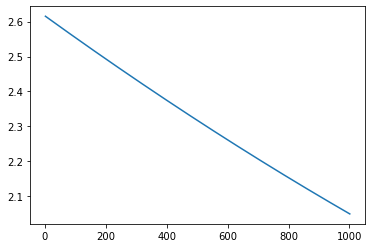

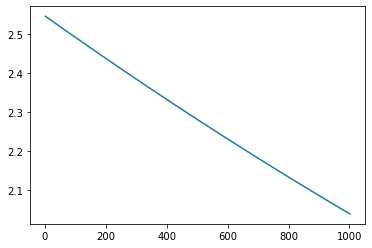

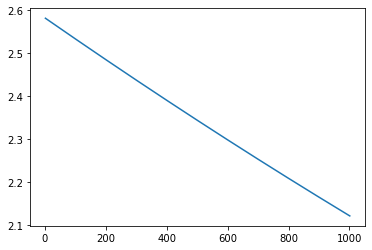

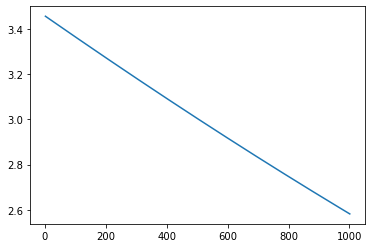

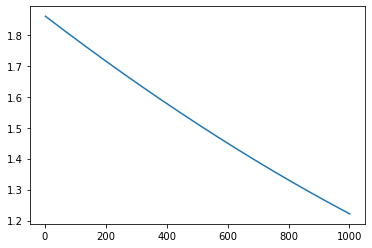

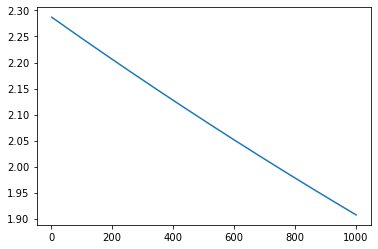

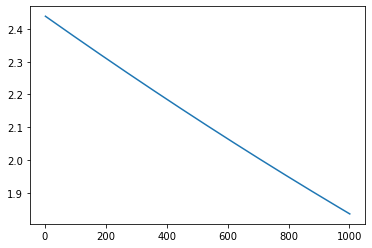

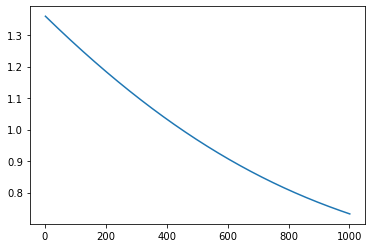

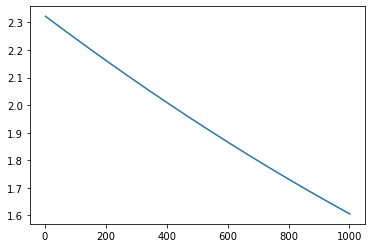

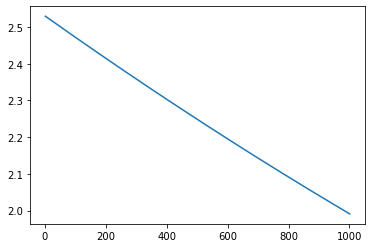

In [15]:
# Plot the loss against the number of epochs
for i in losses:
    plt.plot(np.arange(1, len(i)+1, 1), i)
    plt.show()

In [16]:
pred = []
for i in weights:
    predictions = []
    for elem in predict(x_train, i):
        predictions.append(decision_boundary(elem))
    pred.append(predictions)

In [17]:
test_pred = []
for i in weights:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred.append(predictions)

In [18]:
# Accuracy
for i in range(len(np.unique(y_train))):
    print("Training Accuracy using gradient descent: {}%".format(accuracy(pred[i],train_data[i]) * 100))

Training Accuracy using gradient descent: 53.0%
Training Accuracy using gradient descent: 48.5%
Training Accuracy using gradient descent: 51.75000000000001%
Training Accuracy using gradient descent: 36.5%
Training Accuracy using gradient descent: 45.62500000000001%
Training Accuracy using gradient descent: 52.125%
Training Accuracy using gradient descent: 43.00000000000001%
Training Accuracy using gradient descent: 32.62500000000001%
Training Accuracy using gradient descent: 43.375%
Training Accuracy using gradient descent: 48.375%


In [2]:
# Accuracy
gd_acc = []
for i in range(len(np.unique(y_test))):
    gd_acc.append(accuracy(test_pred[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {0:.2f}%".format(accuracy(test_pred[i],test_data[i]) * 100))

NameError: name 'np' is not defined

## Scikit-Learn module

In [20]:
from sklearn.linear_model import LogisticRegression

In [47]:
# L-BFGS
clf_lbfgs = LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1,solver= "lbfgs").fit(x_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1,solver= "newton-cg").fit(x_train, y_train)

In [48]:
lbfgs_wt = clf_lbfgs.coef_
newt_wt = clf_newt.coef_

In [49]:
test_pred_lbfgs = []
for i in lbfgs_wt:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred_lbfgs.append(predictions)

In [50]:
test_pred_newt = []
for i in newt_wt:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred_newt.append(predictions)

In [51]:
lbfgs_acc = []
for i in range(len(np.unique(y_train))):
    lbfgs_acc.append(accuracy(test_pred_lbfgs[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {}%".format(accuracy(test_pred_lbfgs[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 30.000000000000004%
Testing Accuracy using gradient descent: 51.0%
Testing Accuracy using gradient descent: 51.5%
Testing Accuracy using gradient descent: 39.5%
Testing Accuracy using gradient descent: 55.49999999999999%
Testing Accuracy using gradient descent: 31.999999999999996%
Testing Accuracy using gradient descent: 52.0%
Testing Accuracy using gradient descent: 40.0%
Testing Accuracy using gradient descent: 41.0%
Testing Accuracy using gradient descent: 51.5%


In [52]:
# Accuracy
newt_acc = []
for i in range(len(np.unique(y_test))):
    newt_acc.append(accuracy(test_pred_newt[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {}%".format(accuracy(test_pred_newt[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 30.000000000000004%
Testing Accuracy using gradient descent: 51.0%
Testing Accuracy using gradient descent: 51.5%
Testing Accuracy using gradient descent: 39.5%
Testing Accuracy using gradient descent: 55.49999999999999%
Testing Accuracy using gradient descent: 31.999999999999996%
Testing Accuracy using gradient descent: 52.0%
Testing Accuracy using gradient descent: 40.0%
Testing Accuracy using gradient descent: 41.0%
Testing Accuracy using gradient descent: 51.5%
